In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as mtick
plt.style.use('ggplot')
import seaborn as sns
pd.options.display.float_format = '{:,.0f}'.format
import dataframe_image as dfi
from scipy import stats
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
from sklearn.feature_selection import SequentialFeatureSelector
sfs = SequentialFeatureSelector(lm, n_features_to_select=5)
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from statsmodels.stats.stattools import durbin_watson
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot

In [2]:
Ames = pd.read_csv('Ames_HousePrice.csv')

In [3]:
Ames.head() #1st 5 rows

,Unnamed: 0,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,909176150,856,126000,30,RL,NaN,7890,Pave,NaN,...,166,0,NaN,NaN,NaN,0,3,2010,WD,Normal
1,2,905476230,1049,139500,120,RL,42,4235,Pave,NaN,...,0,0,NaN,NaN,NaN,0,2,2009,WD,Normal
2,3,911128020,1001,124900,30,C (all),60,6060,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2007,WD,Normal
3,4,535377150,1039,114000,70,RL,80,8146,Pave,NaN,...,111,0,NaN,NaN,NaN,0,5,2009,WD,Normal
4,5,534177230,1665,227000,60,RL,70,8400,Pave,NaN,...,0,0,NaN,NaN,NaN,0,11,2009,WD,Normal


In [4]:
#drop extra unnamed column
Ames = Ames.drop('Unnamed: 0', axis=1)

In [5]:
Ames_Data_Types = pd.DataFrame({'Column': Ames.columns, 'Data Type': Ames.dtypes.values})
#Ames_Data_Types.to_csv('Ames_Data_Types.csv', index=False)  #Export, only needed once

In [6]:
#initial inspection
print('Column List\n', Ames.columns) #column list
print('\nStatistical Snapshot:\n', Ames.describe()) #statistical snapshot
print('\nColumns with Missing Values:\n', Ames.isnull().sum()[Ames.isnull().sum() != 0]) #sum of missing values by column name
print('\nRows with Missing Values:\n', Ames[Ames.isnull().any(axis=1)]) #show rows with missing values
print('\nDuplicate Rows:\n', Ames[Ames.duplicated(keep=False)]) #duplicate rows

Column List
 Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning',
       'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
     

In [7]:
Ames = Ames.drop_duplicates(keep = 'first')
print('\nDuplicate Rows:\n', Ames[Ames.duplicated(keep=False)]) #duplicate rows


Duplicate Rows:
 Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, MiscVal, MoSold, YrSold, SaleType, SaleCondition]
Index: []

[0 rows 

In [8]:
Ames_Missing_Values = (
    Ames.isnull().sum()[Ames.isnull().sum() != 0]
    .to_frame('MissingCount')
    .assign(MissingPercent=lambda x: 100 * x['MissingCount'] / len(Ames))
    .reset_index()
    .rename(columns={'index': 'ColumnName'})
)
Ames_Missing_Columns = Ames_Missing_Values['ColumnName']
Ames_Missing_Values

,ColumnName,MissingCount,MissingPercent
0,LotFrontage,462,18
1,Alley,2411,93
2,MasVnrType,1572,61
3,MasVnrArea,14,1
4,BsmtQual,69,3
5,BsmtCond,69,3
6,BsmtExposure,71,3
7,BsmtFinType1,69,3
8,BsmtFinSF1,1,0
9,BsmtFinType2,70,3


In [9]:
Ames_Missing_Columns = Ames[Ames_Missing_Values['ColumnName']]
Ames_Missing_Columns_Numeric = Ames_Missing_Columns.select_dtypes(include=['number'])
Ames_Missing_Columns_Categorical = Ames_Missing_Columns.select_dtypes(include=['object', 'category'])
for col in Ames_Missing_Columns_Categorical.columns:
    print(f'\nValue counts for {col}:')
    print(Ames_Missing_Columns_Categorical[col].value_counts(dropna=False))


Value counts for Alley:
Alley
NaN     2411
Grvl     105
Pave      63
Name: count, dtype: int64

Value counts for MasVnrType:
MasVnrType
NaN        1572
BrkFace     804
Stone       183
BrkCmn       20
Name: count, dtype: int64

Value counts for BsmtQual:
BsmtQual
TA     1166
Gd     1076
Ex      188
Fa       78
NaN      69
Po        2
Name: count, dtype: int64

Value counts for BsmtCond:
BsmtCond
TA     2315
Gd      101
Fa       88
NaN      69
Ex        3
Po        3
Name: count, dtype: int64

Value counts for BsmtExposure:
BsmtExposure
No     1708
Av      344
Gd      242
Mn      214
NaN      71
Name: count, dtype: int64

Value counts for BsmtFinType1:
BsmtFinType1
GLQ    753
Unf    706
ALQ    397
Rec    265
BLQ    250
LwQ    139
NaN     69
Name: count, dtype: int64

Value counts for BsmtFinType2:
BsmtFinType2
Unf    2179
Rec      97
LwQ      84
NaN      70
BLQ      64
ALQ      53
GLQ      32
Name: count, dtype: int64

Value counts for Electrical:
Electrical
SBrkr    2364
FuseA     168


In [10]:
Ames_Missing_Columns_Numeric.head()

,LotFrontage,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath,GarageYrBlt,GarageCars,GarageArea
0,NaN,0,238,0,618,856,1,0,"1,939",2,399
1,42,149,552,393,104,"1,049",1,0,"1,984",1,266
2,60,0,737,0,100,837,0,0,"1,930",1,216
3,80,0,0,0,405,405,0,0,"1,940",1,281
4,70,0,643,0,167,810,1,0,"2,001",2,528


In [11]:
#Round 1 Imputation: Zoning & Quality Pivot Tables
Zoning_Shape_Pivot = Ames.pivot_table(
    index=['MSZoning', 'LotShape'],
    aggfunc={'LotFrontage': 'mean', 'LotArea': 'mean'}
).rename(columns={
    'LotFrontage': 'LotFrontage_Mean',
    'LotArea': 'LotArea_Mean'
})

OverallQual_Cond_Pivot = Ames.pivot_table(
    index=['OverallQual', 'OverallCond'],
    aggfunc={
        'Electrical': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'MasVnrType': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'Electrical': 'Electrical_Mode',
    'MasVnrType': 'MasVnrType_Mode'
})

#Merge Pivots into Ames
Ames = Ames.merge(Zoning_Shape_Pivot.reset_index(), on=['MSZoning', 'LotShape'], how='left')
Ames = Ames.merge(OverallQual_Cond_Pivot.reset_index(), on=['OverallQual', 'OverallCond'], how='left')

#Impute LotFrontage proportionally to LotArea
fallback_ratio = Ames['LotFrontage'].dropna().mean() / Ames['LotArea'].dropna().mean()
Ames['LotFrontage'] = Ames['LotFrontage'].fillna(
    (Ames['LotFrontage_Mean'] / Ames['LotArea_Mean'] * Ames['LotArea']).fillna(fallback_ratio * Ames['LotArea'])
)

#Impute Electrical
Ames['Electrical'] = Ames['Electrical'].fillna(Ames['Electrical_Mode'])
Ames['Electrical'] = Ames['Electrical'].fillna(Ames['Electrical'].dropna().mode().iloc[0])

#MasVnrType: “No Veneer” where area ≤ 0, else from pivot/mode
Ames.loc[Ames['MasVnrType'].isnull() & (Ames['MasVnrArea'] <= 0), 'MasVnrType'] = 'No Veneer'
Ames['MasVnrType'] = Ames['MasVnrType'].fillna(Ames['MasVnrType_Mode'])
Ames['MasVnrType'] = Ames['MasVnrType'].fillna(Ames['MasVnrType'].dropna().mode().iloc[0])

#Clean up Round 1 merge columns
Ames.drop(['LotFrontage_Mean', 'LotArea_Mean', 'Electrical_Mode', 'MasVnrType_Mode'], axis=1, inplace=True)

#Simple Fill for Remaining NAs
Ames.fillna({
    'Alley': 'No Alley Access',
    'BsmtCond': 'No Basement',
    'BsmtExposure': 'No Basement',
    'BsmtFinType1': 'No Basement',
    'BsmtQual': 'No Basement',
    'Fence': 'No Fence',
    'FireplaceQu': 'No Fireplace',
    'GarageType': 'No Garage',
    'MiscFeature': 'No Misc Feature',
    'PoolQC': 'No Pool'
}, inplace=True)

for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'MasVnrArea']:
    Ames[col] = Ames[col].fillna(0)
Ames['MasVnrArea'] = Ames['MasVnrArea'].replace({1: 0})  # correction

In [12]:
#Round 2 Imputation: Garage Pivot Tables
OverallQual_Cond_GarageType_Pivot = Ames.pivot_table(
    index=['OverallQual', 'OverallCond', 'GarageType'],
    aggfunc={
        'GarageFinish': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'GarageQual': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'GarageCond': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'GarageFinish': 'GarageFinish_Mode',
    'GarageQual': 'GarageQual_Mode',
    'GarageCond': 'GarageCond_Mode'
})

#Merge Pivot
Ames = Ames.merge(OverallQual_Cond_GarageType_Pivot.reset_index(),
                  on=['OverallQual', 'OverallCond', 'GarageType'], how='left')

#Imputations
Ames.loc[Ames['GarageType'] == 'No Garage', ['GarageFinish', 'GarageQual', 'GarageCond']] = 'No Garage'
Ames['GarageYrBlt'] = Ames['GarageYrBlt'].fillna(Ames['YearBuilt'])
Ames['GarageFinish'] = Ames['GarageFinish'].fillna(Ames['GarageFinish_Mode'])
Ames['GarageQual'] = Ames['GarageQual'].fillna(Ames['GarageQual_Mode'])
Ames['GarageCond'] = Ames['GarageCond'].fillna(Ames['GarageCond_Mode'])

#Fallbacks
for col in ['GarageFinish', 'GarageQual', 'GarageCond']:
    Ames[col] = Ames[col].fillna(Ames[col].dropna().mode().iloc[0])

#Drop merged columns
Ames.drop(['GarageFinish_Mode', 'GarageQual_Mode', 'GarageCond_Mode'], axis=1, inplace=True)

In [13]:
#BsmtFinType2 Imputation
Ames.loc[Ames['BsmtFinType1'] == 'No Basement', 'BsmtFinType2'] = 'No Basement'
Ames['BsmtFinType2'] = Ames['BsmtFinType2'].fillna(Ames['BsmtFinType2'].dropna().mode().iloc[0])

#Round 3 Imputation: Garage & Basement Pivot Tables
Garage_Qual_Cond_Type_Pivot = Ames.pivot_table(
    index=['GarageQual', 'GarageCond', 'GarageType'],
    aggfunc={
        'GarageArea': 'mean',
        'GarageCars': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'GarageArea': 'GarageArea_Mean',
    'GarageCars': 'GarageCars_Mode'
})

Basement_Qual_FinType1_FinType2_Pivot = Ames.pivot_table(
    index=['BsmtQual', 'BsmtFinType1', 'BsmtFinType2'],
    aggfunc={
        'BsmtFullBath': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan,
        'BsmtHalfBath': lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan
    }
).rename(columns={
    'BsmtFullBath': 'BsmtFullBath_Mode',
    'BsmtHalfBath': 'BsmtHalfBath_Mode'
})

#Merge both pivots
Ames = Ames.merge(Garage_Qual_Cond_Type_Pivot.reset_index(),
                  on=['GarageQual', 'GarageCond', 'GarageType'], how='left')
Ames = Ames.merge(Basement_Qual_FinType1_FinType2_Pivot.reset_index(),
                  on=['BsmtQual', 'BsmtFinType1', 'BsmtFinType2'], how='left')

#Impute numeric + categorical
Ames['GarageArea'] = Ames['GarageArea'].fillna(Ames['GarageArea_Mean'])
Ames['GarageCars'] = Ames['GarageCars'].fillna(Ames['GarageCars_Mode'])
Ames['BsmtFullBath'] = Ames['BsmtFullBath'].fillna(Ames['BsmtFullBath_Mode'])
Ames['BsmtHalfBath'] = Ames['BsmtHalfBath'].fillna(Ames['BsmtHalfBath_Mode'])

#Global fallback fill for residual NaNs
for col in ['GarageArea', 'GarageCars', 'BsmtFullBath', 'BsmtHalfBath']:
    if Ames[col].isnull().any():
        if Ames[col].dtype.kind in 'biufc':
            Ames[col] = Ames[col].fillna(Ames[col].mean())
        else:
            Ames[col] = Ames[col].fillna(Ames[col].mode().iloc[0])

#Drop temporary pivot columns
Ames.drop([
    'GarageArea_Mean', 'GarageCars_Mode',
    'BsmtFullBath_Mode', 'BsmtHalfBath_Mode'
], axis=1, inplace=True)

In [14]:
#Missing Value Check
print('\nColumns with Missing Values:\n', Ames.isnull().sum()[Ames.isnull().sum() != 0]) #sum of missing values by column name
print('\nRows with Missing Values:\n', Ames[Ames.isnull().any(axis=1)]) #show rows with missing values


Columns with Missing Values:
 Series([], dtype: int64)

Rows with Missing Values:
 Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, Mis

In [15]:
Ames_Columns_Numeric = Ames[[
    '1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
    'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch', 'Fireplaces', 'FullBath',
    'GarageArea', 'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
    'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea', 'MiscVal', 'MoSold',
    'OpenPorchSF', 'PoolArea', 'ScreenPorch', 'TotalBsmtSF', 'TotRmsAbvGrd', 'WoodDeckSF',
    'YearBuilt', 'YearRemodAdd', 'YrSold'
]]
Ames_Columns_Ordinal = Ames[[
    'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual',
    'Electrical', 'ExterCond', 'ExterQual', 'Fence', 'FireplaceQu', 'Functional',
    'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'KitchenQual',
    'LandSlope', 'LotShape', 'OverallCond', 'OverallQual', 'PavedDrive',
    'PoolQC', 'Utilities'
]]
Ames_Columns_Nominal = Ames[[
    'Alley', 'BldgType', 'CentralAir', 'Condition1', 'Condition2',
    'Exterior1st', 'Exterior2nd', 'Foundation', 'GarageType', 'Heating',
    'HouseStyle', 'LandContour', 'LotConfig', 'MasVnrType', 'MiscFeature',
    'MSSubClass', 'MSZoning', 'Neighborhood', 'RoofMatl', 'RoofStyle',
    'SaleCondition', 'SaleType', 'Street'
]].astype(str)

In [16]:
value_count_list = []
for col in Ames_Columns_Ordinal.columns:
    counts = Ames_Columns_Ordinal[col].value_counts(dropna=False)
    temp_df = pd.DataFrame({
        'Column Name': col,
        'Value': counts.index,
        'Value Count': counts.values
    })
    value_count_list.append(temp_df)
Ames_Ordinal_ValueCounts = pd.concat(value_count_list, ignore_index=True)
Ames_Ordinal_ValueCounts
#Ames_Ordinal_ValueCounts.to_csv('Ames_Ordinal_ValueCounts.csv', index=False)

,Column Name,Value,Value Count
0,BsmtCond,TA,2315
1,BsmtCond,Gd,101
2,BsmtCond,Fa,88
3,BsmtCond,No Basement,69
4,BsmtCond,Ex,3
...,...,...,...
119,PoolQC,Ex,2
120,PoolQC,Gd,2
121,PoolQC,Fa,2
122,Utilities,AllPub,2577


In [17]:
#Import Ordinal Value Ordering Legend created based off of Ames_Ordinal_ValueCounts export
Ames_Ordinal_Legend = pd.read_csv('Ames_Ordinal_Legend.csv')

#Convert already numeric ordinal values to string in original Dataset
ordinal_cols = Ames_Ordinal_Legend['Name'].unique()
for col in ordinal_cols:
    if col in Ames.columns:
        Ames[col] = Ames[col].astype(str)
# Loop through columns that are in the ordinal legend
for col in Ames.columns:
    if col in Ames_Ordinal_Legend['Name'].unique():
        # Create the mapping dictionary for this column
        mapping_dict = Ames_Ordinal_Legend.loc[Ames_Ordinal_Legend['Name'] == col,
                                               ['Value', 'Value_Order']].set_index('Value')['Value_Order'].to_dict()
        # Map values in Ames[col] using this dictionary
        Ames[col] = Ames[col].map(mapping_dict)

#Missing Value Check
print('\nColumns with Missing Values:\n', Ames.isnull().sum()[Ames.isnull().sum() != 0]) #sum of missing values by column name
print('\nRows with Missing Values:\n', Ames[Ames.isnull().any(axis=1)]) #show rows with missing values

# Check the data types and unique values
ordinal_cols = Ames_Ordinal_Legend['Name'].unique() # List of ordinal columns
# Check dtype and unique values as plain Python ints
for col in ordinal_cols:
    if col in Ames.columns:
        unique_vals = [int(v) for v in sorted(Ames[col].dropna().unique())]
        print(f"{col}: dtype={Ames[col].dtype}, unique values={unique_vals}")


Columns with Missing Values:
 Series([], dtype: int64)

Rows with Missing Values:
 Empty DataFrame
Columns: [PID, GrLivArea, SalePrice, MSSubClass, MSZoning, LotFrontage, LotArea, Street, Alley, LotShape, LandContour, Utilities, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, OverallQual, OverallCond, YearBuilt, YearRemodAdd, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, MasVnrArea, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinSF1, BsmtFinType2, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, Heating, HeatingQC, CentralAir, Electrical, 1stFlrSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, KitchenQual, TotRmsAbvGrd, Functional, Fireplaces, FireplaceQu, GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond, PavedDrive, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, PoolQC, Fence, MiscFeature, Mis

In [18]:
#Custom Histogram KDE Function
def custom_kde(frame_name, col_name):
    
    sns.set_style('whitegrid')      # Style setup

    # Calculate Mean, Median, Mode for SalePrice
    mean_col = frame_name[col_name].mean()
    median_col = frame_name[col_name].median()
    mode_col = frame_name[col_name].mode().values[0]
     
    # Plotting histogram
    plt.figure(figsize=(14, 7))
    sns.histplot(x=frame_name[col_name], bins=100, kde=True, color='skyblue')
    plt.axvline(mean_col, color='r', linestyle='--', label=f'Mean: {mean_col:,.0f}')
    plt.axvline(median_col, color='g', linestyle='-', label=f'Median: {median_col:,.0f}')
    plt.axvline(mode_col, color='b', linestyle='-.', label=f'Mode: {mode_col:,.0f}')
     
    # Annotations for skewness and kurtosis
    plt.annotate('Skewness: {:.2f}\nKurtosis: {:.2f}'.format(frame_name[col_name].skew(), frame_name[col_name].kurt()),
                 xy=(500000, 100), fontsize=14, bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='aliceblue'))
     
    plt.title(col_name)
    plt.legend()
    plt.xlabel(col_name)
    plt.ylabel('Frequency')
    plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
    plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
    plt.show()

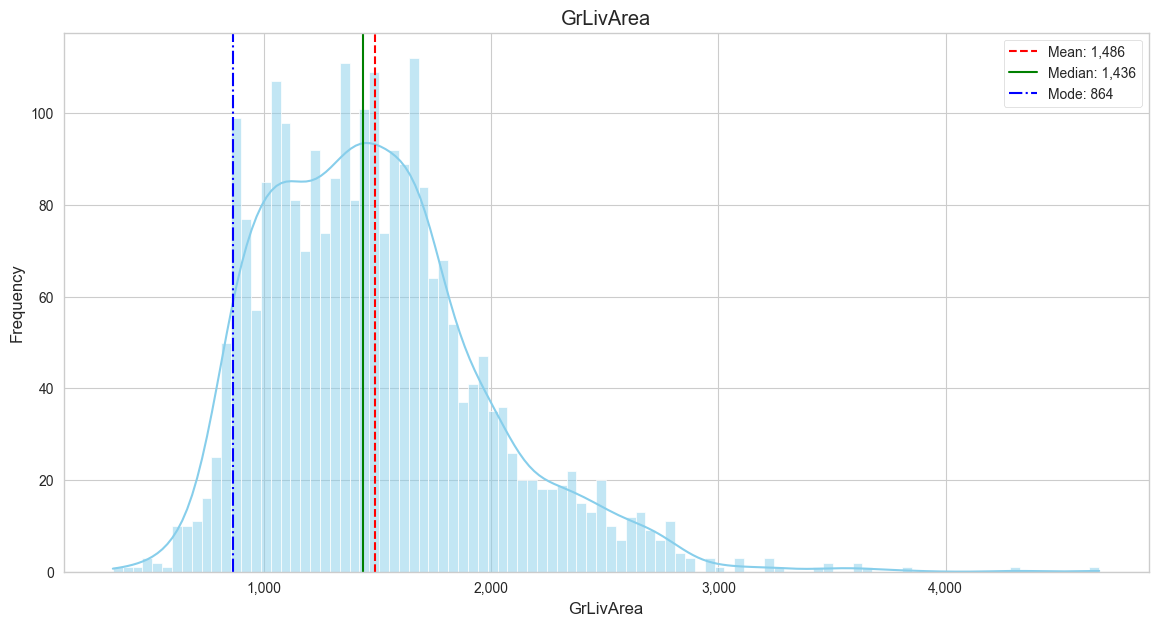

In [17]:
custom_kde(Ames, 'GrLivArea')

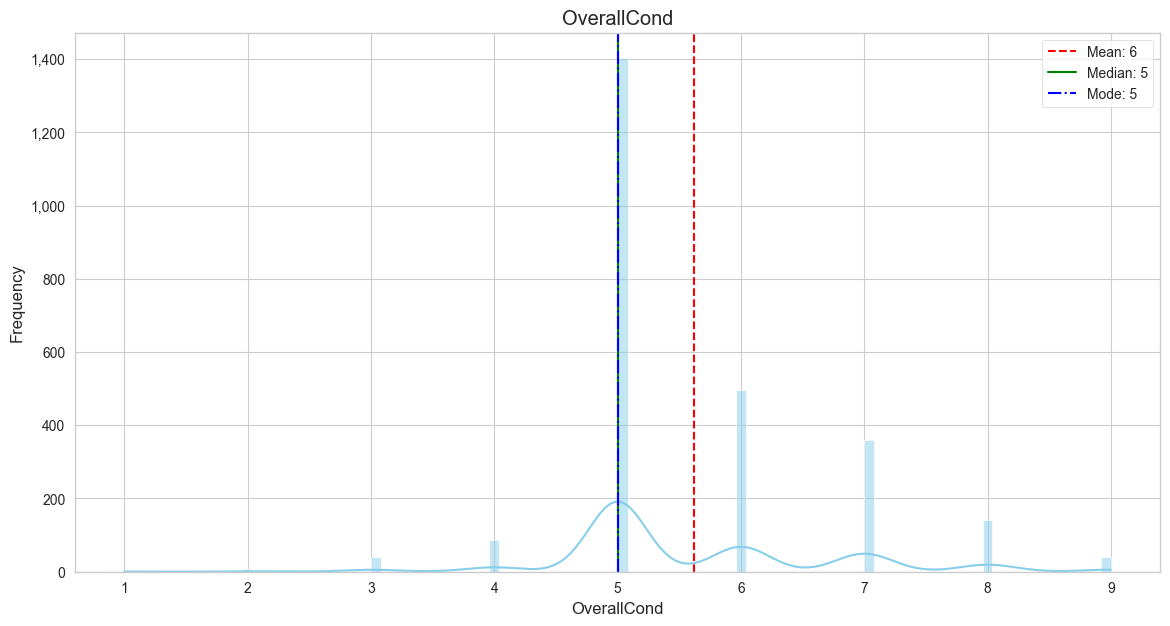

In [18]:
custom_kde(Ames, 'OverallCond')

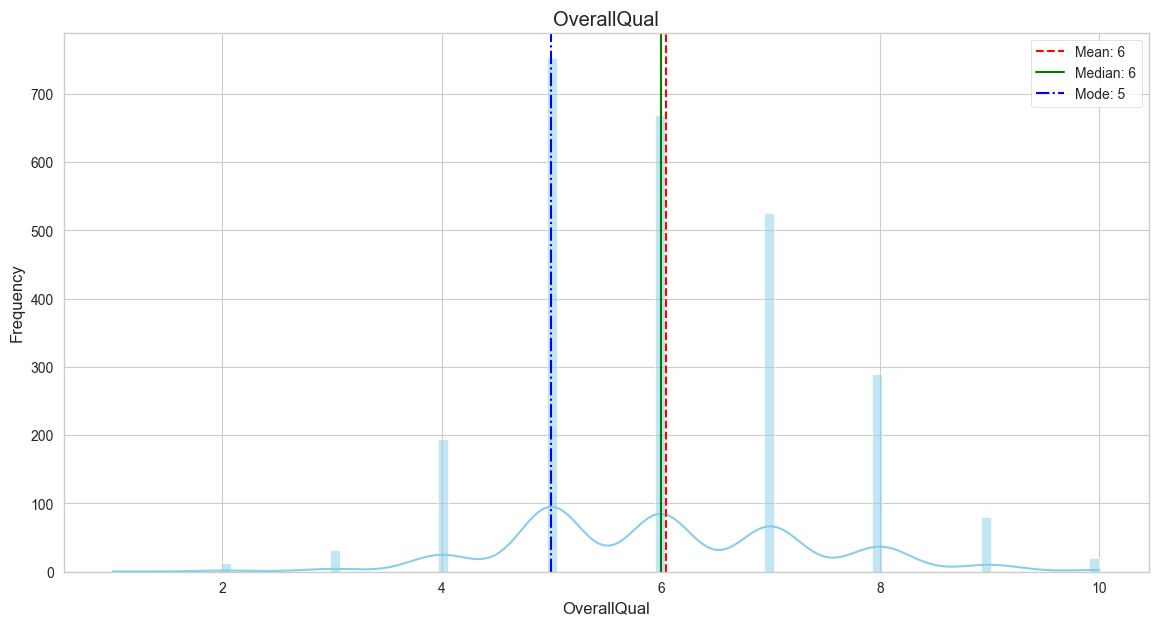

In [19]:
custom_kde(Ames, 'OverallQual')

Text(0, 0.5, 'Price')

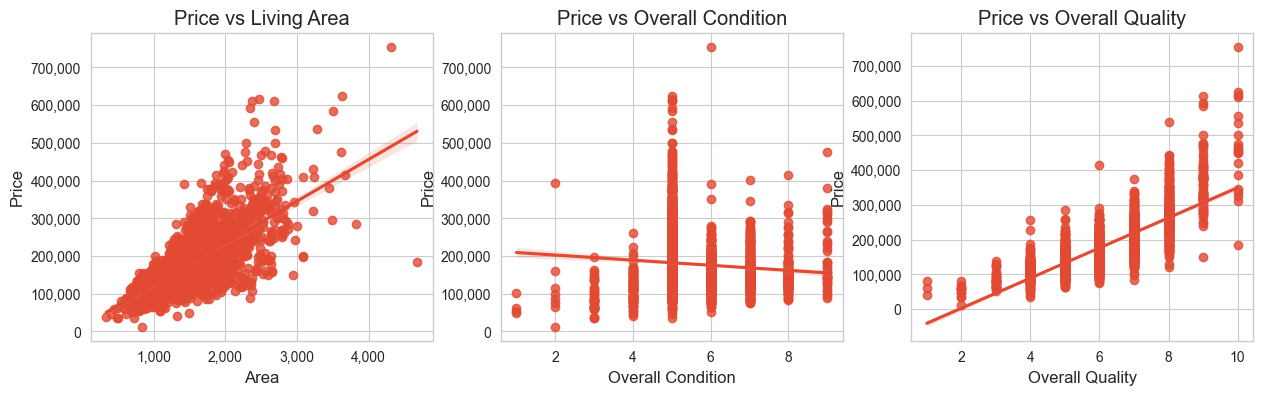

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))

scat1 = sns.regplot(x='GrLivArea', y='SalePrice', data=Ames, ax=ax[0])
scat1.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
scat1.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax[0].set_title('Price vs Living Area')
ax[0].set_xlabel('Area')
ax[0].set_ylabel('Price')
 
scat2 = sns.regplot(x='OverallCond', y='SalePrice', data=Ames, ax=ax[1])
scat2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
scat2.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax[1].set_title('Price vs Overall Condition')
ax[1].set_xlabel('Overall Condition')
ax[1].set_ylabel('Price')

scat3 = sns.regplot(x='OverallQual', y='SalePrice', data=Ames, ax=ax[2])
scat3.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))
scat3.yaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax[2].set_title('Price vs Overall Quality')
ax[2].set_xlabel('Overall Quality')
ax[2].set_ylabel('Price')

In [21]:
kf = KFold(n_splits=5, shuffle=True, random_state=2)

In [22]:
Y = Ames['SalePrice']
X = Ames[['GrLivArea']]

lm.fit(X, Y)
r2 = cross_val_score(lm, X, Y, cv=kf, scoring='r2')
print(f"R² per fold: {', '.join(f'{r:.4f}' for r in r2)}")
print(f"Average R²: {r2.mean():.4f}")
print(f"Intercept: {lm.intercept_:.2f}")
print(f"Coefficient: {lm.coef_[0]:.4f}")

R² per fold: 0.5219, 0.5352, 0.4719, 0.5277, 0.5254
Average R²: 0.5164
Intercept: 13774.12
Coefficient: 110.5551


In [23]:
X = Ames[['GrLivArea', 'OverallQual', 'OverallCond']]
lm.fit(X, Y)
r2 = cross_val_score(lm, X, Y, cv=kf, scoring='r2')
print(f"R² per fold: {', '.join(f'{r:.4f}' for r in r2)}")
print(f"Average R²: {r2.mean():.4f}")
print(f"Intercept: {lm.intercept_:.2f}")
print(f"Coefficient: {lm.coef_[0]:.4f}")

R² per fold: 0.7138, 0.7342, 0.7109, 0.7391, 0.7771
Average R²: 0.7350
Intercept: -99560.28
Coefficient: 61.9534


In [24]:
X = Ames[['GrLivArea', 'OverallQual']]
lm.fit(X, Y)
r2 = cross_val_score(lm, X, Y, cv=kf, scoring='r2')
print(f"R² per fold: {', '.join(f'{r:.4f}' for r in r2)}")
print(f"Average R²: {r2.mean():.4f}")
print(f"Intercept: {lm.intercept_:.2f}")
print(f"Coefficient: {lm.coef_[0]:.4f}")

R² per fold: 0.7139, 0.7351, 0.7109, 0.7391, 0.7772
Average R²: 0.7352
Intercept: -101360.73
Coefficient: 62.0045


In [25]:
#Sequential Feature Selector
X = Ames_Columns_Numeric
feature_scores = {}

# Evaluate each feature with cross-validation
for feature in X.columns:
    X_single = X[[feature]]
    cv_scores = cross_val_score(lm, X_single, Y)
    feature_scores[feature] = cv_scores.mean()
 
# Identify the top 5 features based on mean CV R² scores
sorted_features = sorted(feature_scores.items(), key=lambda item: item[1], reverse=True)
top_5 = sorted_features[0:5]
 
# Display the top 5 features and their individual performance
for feature, score in top_5:
    print(f"Feature: {feature}, Mean CV R²: {score:.4f}")

Feature: GrLivArea, Mean CV R²: 0.5127
Feature: TotalBsmtSF, Mean CV R²: 0.4064
Feature: GarageCars, Mean CV R²: 0.3970
Feature: 1stFlrSF, Mean CV R²: 0.3957
Feature: GarageArea, Mean CV R²: 0.3939


In [26]:
# Extracting the top 5 features for our multiple linear regression
top_features = [feature for feature, score in top_5]
 
# Building the model with the top 5 features
X_top = Ames[top_features]
 
# Evaluating the model with cross-validation
cv_scores_mlr = cross_val_score(lm, X_top, Y, cv=5, scoring="r2")
mean_mlr_score = cv_scores_mlr.mean()
 
print(f"Mean CV R² Score for MLR Model: {mean_mlr_score:.4f}")

Mean CV R² Score for MLR Model: 0.7177


In [27]:
sfs.fit(X, Y)
selected_features = X.columns[sfs.get_support()].to_list()
print(f"Features selected by SFS: {selected_features}")
 
scores = cross_val_score(lm, Ames[selected_features], Y)
print(f"Mean CV R² Score using SFS with n=5: {scores.mean():.4f}")

Features selected by SFS: ['BedroomAbvGr', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt']
Mean CV R² Score using SFS with n=5: 0.7842


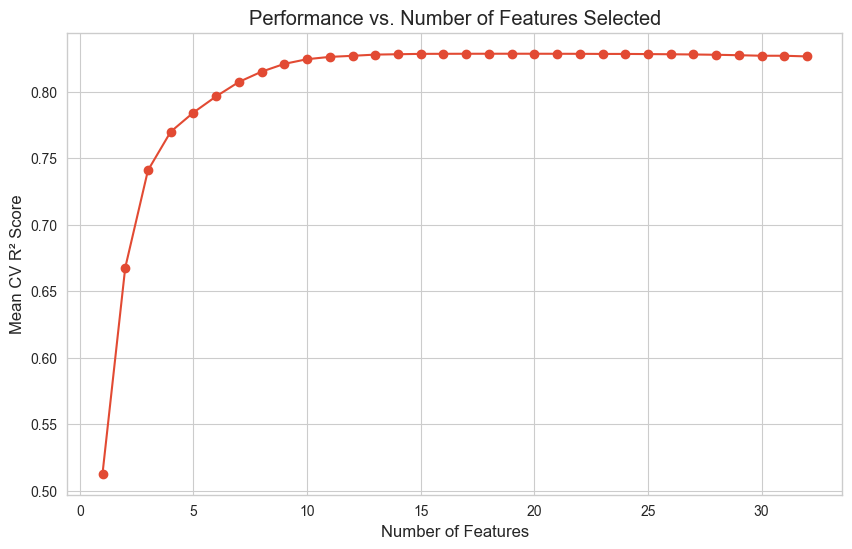

In [28]:
# Prepare to store the mean CV R² scores for each number of features
mean_scores = []
 
# Iterate over a range from 1 feature to the maximum number of features available
for n_features_to_select in range(1, len(X.columns)):
    sfs = SequentialFeatureSelector(lm, n_features_to_select=n_features_to_select)
    sfs.fit(X, Y)
    selected_features = X.columns[sfs.get_support()]
    score = cross_val_score(lm, X[selected_features], Y, cv=5, scoring="r2").mean()
    mean_scores.append(score)
 
# Plot the mean CV R² scores against the number of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(X.columns)), mean_scores, marker="o")
plt.title("Performance vs. Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Mean CV R² Score")
plt.grid(True)
plt.show()

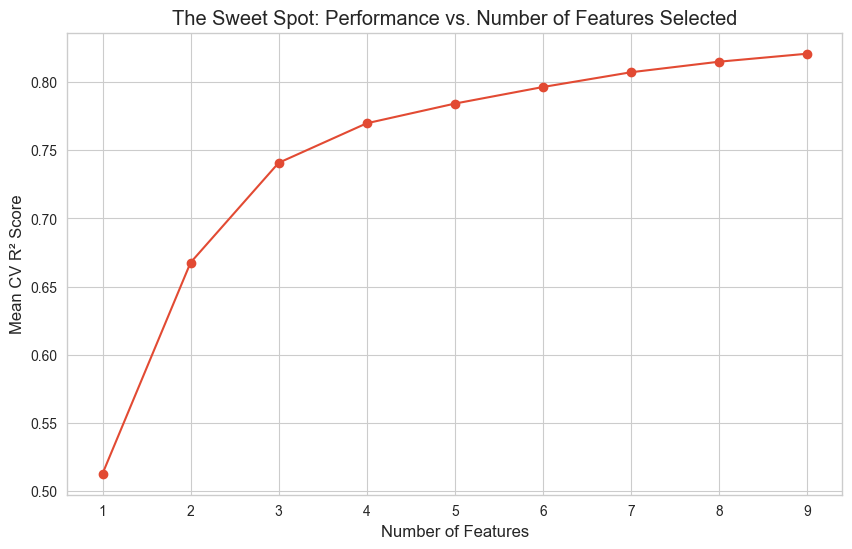

Number of features selected: 9
Selected features: ['BedroomAbvGr', 'BsmtFinSF1', 'GarageArea', 'GrLivArea', 'KitchenAbvGr', 'MasVnrArea', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd']
Mean CV R² Score using SFS with tol=0.005: 0.8208


In [29]:
# Apply Sequential Feature Selector with tolerance = 0.005, building on code above
sfs_tol = SequentialFeatureSelector(lm, n_features_to_select="auto", tol=0.005)
sfs_tol.fit(X, Y)
 
# Get the number of features selected with tolerance
n_features_selected = sum(sfs_tol.get_support())
 
# Prepare to store the mean CV R² scores for each number of features
mean_scores_tol = []
 
# Iterate over a range from 1 feature to the Sweet Spot
for n_features_to_select in range(1, n_features_selected + 1):
    sfs = SequentialFeatureSelector(lm, n_features_to_select=n_features_to_select)
    sfs.fit(X, Y)
    selected_features = X.columns[sfs.get_support()]
    score = cross_val_score(lm, X[selected_features], Y, cv=5, scoring="r2").mean()
    mean_scores_tol.append(score)
 
# Plot the mean CV R² scores against the number of features selected
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_features_selected + 1), mean_scores_tol, marker="o")
plt.title("The Sweet Spot: Performance vs. Number of Features Selected")
plt.xlabel("Number of Features")
plt.ylabel("Mean CV R² Score")
plt.grid(True)
plt.show()

# Print selected features and their performance
selected_features = X.columns[sfs_tol.get_support()]
print(f"Number of features selected: {n_features_selected}")
print(f"Selected features: {selected_features.tolist()}")
print(f"Mean CV R² Score using SFS with tol=0.005: {mean_scores_tol[-1]:.4f}")